<a href="https://colab.research.google.com/github/Git-Hub-Ran/Machine_Learning/blob/dev/Titanic_Survival_Prediction_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: left">

# 🐍 Titanic Survival Prediction - ML Project

---

## 📝 Task Description

**Goal:** Complete an **ML project** to predict survival on the Titanic using Python and pandas.

### Steps:
1. 📂 **Load the Titanic dataset**  
   - Use the Kaggle Titanic dataset or any CSV copy.
2. 🧹 **Clean / Transform the data**  
3. 🤖 **Train a basic classifier**  
   - Logistic Regression
4. 📊 **Evaluate the model**  
   - Accuracy, confusion matrix, or other relevant metrics
5. 📝 **Document the process**  
   - Describe the problem, approach, and results

This project helps you **solidify Python and ML skills** and demonstrates your ability to apply **machine learning principles** in code.
</div>


In [70]:
#Based on https://www.kaggle.com/competitions/titanic/data
#Importing Libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set()

#import warnings
#warnings.filterwarnings("ignore")

# Raw URLs from GitHub
url_train = "https://raw.githubusercontent.com/Git-Hub-Ran/Machine_Learning/refs/heads/main/train.csv"
url_test  = "https://raw.githubusercontent.com/Git-Hub-Ran/Machine_Learning/refs/heads/main/test.csv"

# Loading the files
train = pd.read_csv(url_train) #used to build and train the machine learning models
test  = pd.read_csv(url_test) #used to see how well the model performs on unseen data

# Display the first 5 lines from each file:
print(f"train file:\n{'-'*100}")
print(train.head()) #The training set should be used to build your machine learning models.

#print(f"\n test file:\n{'-'*50}")
#print(test.head()) #The test set should be used to see how well your model performs on unseen data.

train file:
----------------------------------------------------------------------------------------------------
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN       

Exploratory Data Analysis (EDA):
-----------------------------------

In [71]:
#survival rate:
survival_rate = train['Survived'].mean()
print(f"Survival rate: {survival_rate:.2%}")

Survival rate: 38.38%


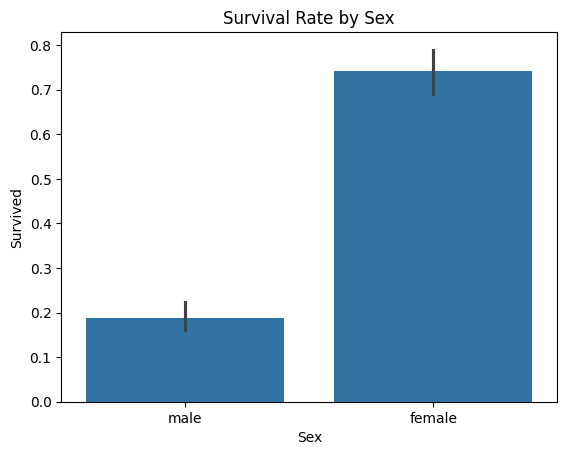

In [72]:
# Survival Rate by Sex:
sns.barplot(x='Sex', y='Survived', data=train)

#train.plot(x='Sex', y='Survived',kind='line')
plt.title('Survival Rate by Sex')
plt.show()


We can see that more Females survived than Males.

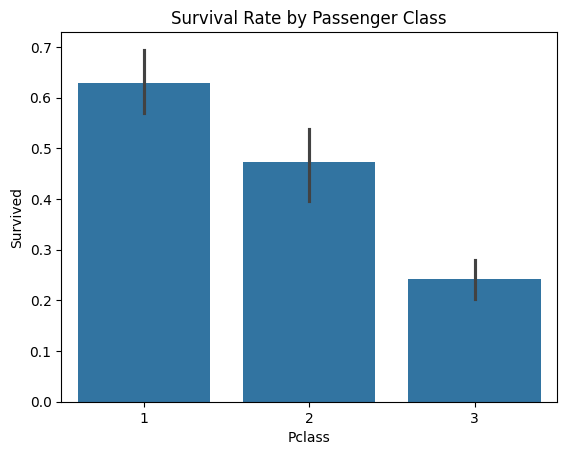

In [73]:
# Survival Rate by Passenger Class:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.show()

Passengers from the first class survived better than those from other classes.

As you are a passenger from a lower class, your chance of survival is lower.

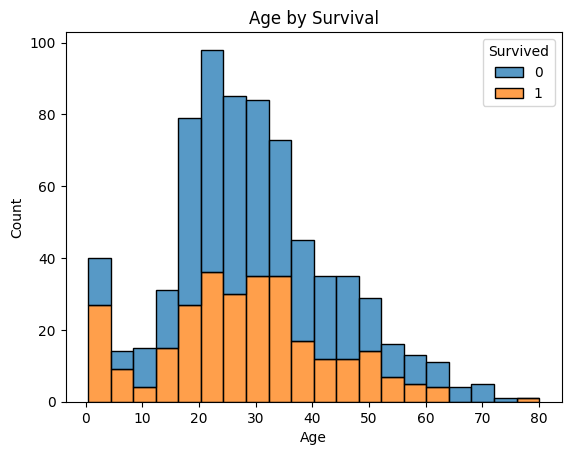

In [74]:
# Age by Survival
sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Age by Survival')
plt.show()


Small children survived more than grown ups.

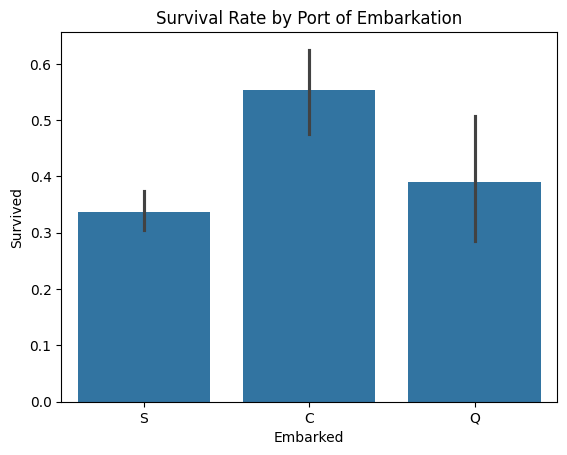

In [75]:

# Survival Rate by Port of Embarkation:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survival Rate by Port of Embarkation')
plt.show()
#C = Cherbourg, Q = Queenstown, S = Southampton

Passengers that used Cherbourg port survived better than passengers who use different ports.

In [76]:
#Show the all descriptive statistics:
print(train.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

In [77]:
#show number or rows in the dataset:
train.shape

(891, 12)

We have in total 891 records in the Train dataset.

In [78]:
# checking if any column has some missing values:
missing_values = train.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We see that Age, Cabin and Embarked have missing values.

Checking the percentage out of the total:

In [79]:
(missing_values[missing_values > 0]/ len(train))* 100

,0
Age,19.865320
Cabin,77.104377
Embarked,0.224467


We will have to fix/fill them in:

*   Age: Fill missing values with the mean to minimize impact on the model.

*   Cabin: Exclude this feature, as over 50% of values are missing.

*   Embarked: Fill the two missing entries with the most common value.

In [80]:
train_fixed = train.copy() #create a copy of Train:

#Fill in Age:
age_mean = train['Age'].mean() # find the mean of Age
train_fixed['Age'] = train_fixed['Age'].fillna(age_mean) #fill in the missing values with the mean

#Fill in Embarked:
embarked_mode = train['Embarked'].mode()[0]
train_fixed['Embarked'] = train_fixed['Embarked'].fillna(embarked_mode) #fill in the missing values with the most common

#Drop Cabin column:
train_fixed=train_fixed.drop(['Cabin'], axis=1)

#cheking we don't have null values:
train_fixed.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Now we need to handel all the descriptive features and  :

*   PassengerId, Name and Ticket columns: Shouldn't matter to the model, so I will drop them.
*   Sex : Has "female"\"male" values. I will convert to binary dummy variables.
*   Pclass : Has 1\2\3 values, this numbers represent catagories. I will convert to binary dummy variables, so it will not think there this are continues numeric values.
*   Embarked : Has S\C\Q values. I will convert to binary dummy variables.



In [81]:
#Drop PassengerId column(it is just an identifier and has no predictive value):
train_fixed=train_fixed.drop(['PassengerId'], axis=1)

#Drop Name column:
train_fixed=train_fixed.drop(['Name'], axis=1)

#Drop Ticket column:
train_fixed=train_fixed.drop(['Ticket'], axis=1)

In [82]:
# create dummy columns for "Pclass","Embarked","Sex":
train_fixed = pd.get_dummies(train_fixed, columns=["Pclass","Embarked","Sex"], drop_first=True, dtype='uint8')
#Chacking the values changes:
train_fixed.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,0,1,0,1,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,1,0
3,1,35.0,1,0,53.1000,0,0,0,1,0
4,0,35.0,0,0,8.0500,0,1,0,1,1


In [83]:
# setting the seeds: so we will be sure we will get the same result when running the model
import keras

keras.utils.set_random_seed(42)

For the Titanic we will use a Logistic Regression model, because we want to predict the probability of surviving or not (we will have 2 classes).

0 = Did not survive, 1 = Survived

In [99]:
#Defining the target (Y) and the feature columns (x):
Y = train_fixed['Survived']
x = train_fixed[["Age","SibSp","Parch","Fare","Pclass_2","Pclass_3","Embarked_Q","Embarked_S","Sex_male"]]

#Split the data into training set and validation set:
X_train, X_test, y_train, y_test  = train_test_split(x, Y, test_size=0.2, random_state=42)

# Scale features using Z-score normalization (StandardScaler):
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fit only on training data:
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data:
X_val_scaled = scaler.transform(X_test)

#Defining the model to Logistic Regression:
model = LogisticRegression(max_iter=1000)

#Train the model on the training set:
model.fit(X_train_scaled,y_train)

#Predict Survived on the validation data:
y_prediction = model.predict(X_val_scaled)

           Age  SibSp  Parch      Fare  Pclass_2  Pclass_3  Embarked_Q  \
331  45.500000      0      0   28.5000         0         0           0   
733  23.000000      0      0   13.0000         1         0           0   
382  32.000000      0      0    7.9250         0         1           0   
704  26.000000      1      0    7.8542         0         1           0   
813   6.000000      4      2   31.2750         0         1           0   
..         ...    ...    ...       ...       ...       ...         ...   
106  21.000000      0      0    7.6500         0         1           0   
270  29.699118      0      0   31.0000         0         0           0   
860  41.000000      2      0   14.1083         0         1           0   
435  14.000000      1      2  120.0000         0         0           0   
102  21.000000      0      1   77.2875         0         0           0   

     Embarked_S  Sex_male  
331           1         1  
733           1         1  
382           1         1  

In [85]:
#show the accuracy of the model
print('Accuracy:',model.score(X_val_scaled, y_test) )

Accuracy: 0.7988826815642458


The model correctly predicts 79% of the cases on the test data.

In [86]:
#create confusion matrix::
print ("Confusion matrix:")
confusion_matrix(y_test, y_prediction)

Confusion matrix:


array([[90, 15],
       [21, 53]])

Based on the confusion matrix:

* The model predicts that 90 passengers did not survive, and in reality they also did not survive.

* The model predicts that 21 passengers did not survive, but in reality they did survive.

* The model predicts that 15 passengers survived, but in reality they did not survive.

* The model predicts that 53 passengers survived, and in reality they also survived.

In [87]:
#create classification report:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



The model predict correctly 79% accuracy.

The model predicts non-survivors better than survivors.

In [88]:
#For each X test data, it will show the probebility to be Positive class and the probability to be Negative class.
proba_all = model.predict_proba(X_val_scaled)
print(proba_all[:5]) #show only 5 rows

[[0.89795916 0.10204084]
 [0.73857881 0.26142119]
 [0.87781997 0.12218003]
 [0.08916592 0.91083408]
 [0.25132998 0.74867002]]


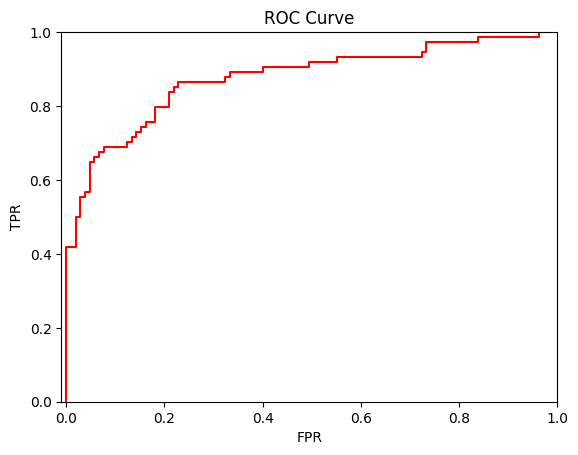

In [89]:
#Take only the positive calss probibility (probibility of serviving):
y_pred_proba = proba_all[:, 1] #takes all the rows from the second column (that is the possitive class proberbility).
[fpr, tpr, thresholds] = roc_curve(y_test, y_pred_proba)

#Plot the ROC curve:
plt.figure()
plt.plot(fpr,tpr, 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.xlim([-0.01 , 1.0])
plt.ylim([0.0 , 1.0])
plt.show()

The ROC Curve summarizes all the confusion matrices for all possible thresholds. It show the connection between TPR and FPR.

The closer the curve is to the top left corner, the better the model can tell who survived and who did not.

In [90]:
# ROC Area under the curve:
roc_auc = auc(fpr, tpr)
print("AUC:",roc_auc)

AUC: 0.8759330759330759


AUC=0.87, the model separates survivors from non-survivors well

**Use the Test file to predict :**

---
We want to see how well the model performs on unseen data.

Perform the same commands on the test file:


In [91]:
#show number or rows in the dataset:
test.shape

(418, 11)

We have in total 418 records in the Train dataset.

In [92]:
#Checking the missing values percentage out of the total:
(missing_values[missing_values > 0]/ len(test))* 100

,0
Age,42.344498
Cabin,164.354067
Embarked,0.478469


In the Test file we see that we are missing data from 'Fare'and we are not missing any data on Embarked'.

I will perform the same cleaning and fixing tasks on the test file:

In [93]:
test_fixed = test.copy() #create a copy of Train:

#Fill in Age:
age_mean = test['Age'].mean() # find the mean of Age
test_fixed['Age'] = test_fixed['Age'].fillna(age_mean) #fill in the missing values with the mean

#Fill in Fare:
Fare_mode = test['Fare'].mode()[0]
test_fixed['Fare'] = test_fixed['Fare'].fillna(Fare_mode) #fill in the missing values with the most common

#Drop Cabin column:
test_fixed=test_fixed.drop(['Cabin'], axis=1)

#Drop Name column:
test_fixed=test_fixed.drop(['Name'], axis=1)

#Drop Ticket column:
test_fixed=test_fixed.drop(['Ticket'], axis=1)

#cheking we don't have null values:
test_fixed.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [94]:
# create dummy columns for "Pclass","Embarked","Sex":
test_fixed = pd.get_dummies(test_fixed, columns=["Pclass","Embarked","Sex"], drop_first=True, dtype='uint8')

#Chacking the values changes:
test_fixed.head()


,PassengerId,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,892,34.5,0,0,7.8292,0,1,1,0,1
1,893,47.0,1,0,7.0000,0,1,0,1,0
2,894,62.0,0,0,9.6875,1,0,1,0,1
3,895,27.0,0,0,8.6625,0,1,0,1,1
4,896,22.0,1,1,12.2875,0,1,0,1,0


In [95]:
#make sure we have the same columns between the train file and the test file ( except 'Survived' )
print(test_fixed.columns )
print(train_fixed.columns)

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')
Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')


In [96]:
#Defining the feature columns (x), the same order as the training file:
X_test_file = test_fixed[["Age","SibSp","Parch","Fare","Pclass_2","Pclass_3","Embarked_Q","Embarked_S","Sex_male"]]

# Scale the test file using the scaler fitted on training data
X_test_file_scaled = scaler.transform(X_test_file)


#Predict Survived on the same model we trained:
y_prediction_test_file = model.predict(X_test_file_scaled)

In [97]:
#Create a file with teh prediction results of my model on the test file:
output = pd.DataFrame({'PassengerId': test['PassengerId'],'Survived': y_prediction_test_file })
output.to_csv("Output_file.csv")
print(output.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
